In [33]:
import json
import munch
import numpy as np
import equations as eqn
import PA_plot as pap
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex, display
import scipy.stats as sts
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

config_path = r'/Users/arashfahim/Documents/Corporate-Governance-and-Asset-Pricing/Jupyter_data'

import warnings
warnings.filterwarnings('ignore')



# Parameters

In [34]:
config_dict = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(2,3)
        ],
        "\u03c1": [# rho
        i*0.05 for i in range(2,3)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

config_dict1 = {
        "Parameters": {
        "\u03bc:":  1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(0,3,2)
        ],
        "\u03c1": [# rho
        i*0.05 for i in range(0,3,2)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

In [35]:
config = munch.munchify(config_dict)
config1 = munch.munchify(config_dict1)
print('Parameters for scenario 1:\n',config)
print('Parameters for scenario 2:\n',config1)

Parameters for scenario 1:
 Munch({'Parameters': Munch({'μ:': 1.0, 'γ:': 0.2, 'r:': 0.1, 'λ': 0.5, 'σ': [0.3333333333333333], 'ρ': [0.1]}), 'Numerical_settings': Munch({'range': 10.0, 'Number_of_points': 2000, 'df0': 5, 'Stop_criterion_for_F_ODE': 0.001, 'Upper_dy_lim': 1000, 'Lower_dy_lim': 0.1, 'num_iterations': 200}), 'color': 'green'})
Parameters for scenario 2:
 Munch({'Parameters': Munch({'μ:': 1.0, 'γ:': 0.2, 'r:': 0.1, 'λ': 0.5, 'σ': [1.0, 0.3333333333333333], 'ρ': [0.0, 0.1]}), 'Numerical_settings': Munch({'range': 10.0, 'Number_of_points': 2000, 'df0': 5, 'Stop_criterion_for_F_ODE': 0.001, 'Upper_dy_lim': 1000, 'Lower_dy_lim': 0.1, 'num_iterations': 200}), 'color': 'green'})


Scenario 1. Dictated monitoring 

$\sigma_0 = 0.5$ and $\rho_1=0.1$


Scenario 2. Optimal monitoring

$\sigma_0 = 1$,$\sigma_1 = 0.\bar{3}$, $\rho_0=0$, and $\rho_1=0.1$.

# Soving the ODEs

In [36]:
PA_list=[]
PA_tmp = getattr(eqn, "eqn_FfS")(config)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp.param)
PA_tmp.bvp()
print(PA_tmp.message)
PA_list.append(PA_tmp)

PA_tmp1 = getattr(eqn, "eqn_FfS")(config1)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp1.param)
PA_tmp1.bvp()
print(PA_tmp1.message)
PA_list.append(PA_tmp1)

Switching values and active regimes:
 
[mu, gamma, r ,lmb ,sgm, rho]:  [1.0, 0.2, 0.1, 0.5, [0.3333333333333333], [0.1]]
var =  0.12107        Iteration =  50
var =  0.12259        Iteration =  100
var =  0.10486        Iteration =  150
var =  0.09007        Iteration =  200
var =  0.09007        Iteration =  200
BVP for S is solved in 0.010104 seconds.

BVP for T is solved in 0.00116 seconds.

BVP for C is solved in 0.001025 seconds.


This solves the value function as a function of w, the agent's utility.

If the three numbers below, approximations of payment boundary by three methods,are almost equal, the scheme is working. 
Otherwise, reset df0 in the json file and run the code again.
Calculation of payment boundary by three methods: 
Minimum of abs(F-(mu-gamma*x)/r,  Minimum of abs(dF+1), and Minimum of abs(ddF) are, respectively, at
2.08604, 1.25563, and 0.86543. 
The value of dF(0) is 32.03929. 
If the principal has the bargaining power, the minimum utility of the agent is 0.575

In [37]:
SOL = PA_list[0]
SOL1 = PA_list[1]

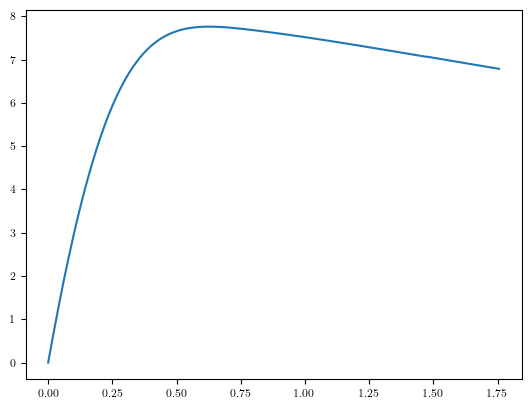

In [42]:
F = np.array(SOL1.f)
plt.plot(SOL1.x,F);

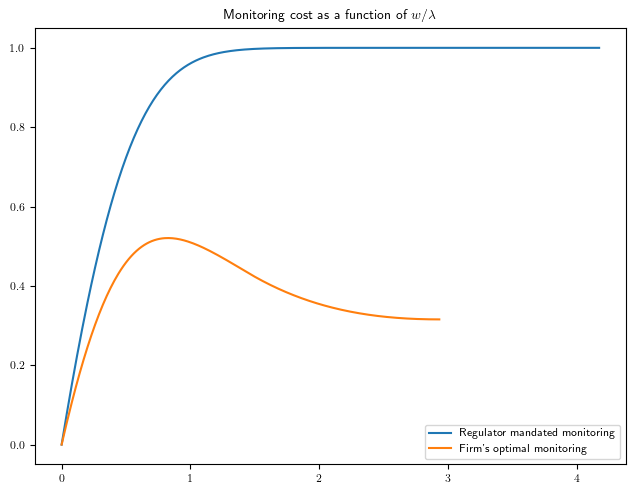

In [39]:
C = np.array(SOL.C)
C1 = np.array(SOL1.C)
plt.plot(SOL.mS,C,label='Regulator mandated monitoring');
plt.plot(SOL1.mS,C1,label='Firm\'s optimal monitoring');
plt.legend();
plt.tight_layout();
plt.title(r'Monitoring cost as a function of $w/\lambda$');
np.savetxt('mandatory_C_vs_m.dat', np.column_stack((SOL.mS,C)), delimiter=',',header="M,mandate") 
np.savetxt('optimal_C_vs_m.dat', np.column_stack((SOL1.mS,C1)), delimiter=',',header="M,optimal")

The value of the bond as a function of $m$ is $f(m)+m-(1-\lambda)\mathcal{S}(m)+\mathcal{C}(m)$.

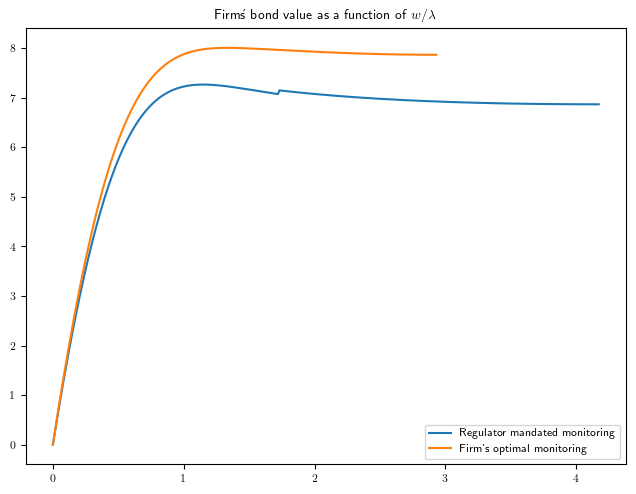

In [40]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
B = SOL.f[:ind]+SOL.mS-(1-SOL.param[3])*SOL.S + SOL.C
B1 = SOL1.f[:ind1]+SOL1.mS-(1-SOL1.param[3])*SOL1.S + SOL1.C
plt.plot(SOL.mS,B,label='Regulator mandated monitoring')
plt.plot(SOL1.mS,B1,label='Firm\'s optimal monitoring');
plt.legend();
plt.tight_layout();
plt.title(r'Firm\'s bond value as a function of $w/\lambda$');
np.savetxt('mandatory_bond_vs_m.dat', np.column_stack((SOL.mS,B)), delimiter=',',header="M,mandate") 
np.savetxt('optimal_bond_vs_m.dat', np.column_stack((SOL1.mS,B1)), delimiter=',',header="M,optimal")

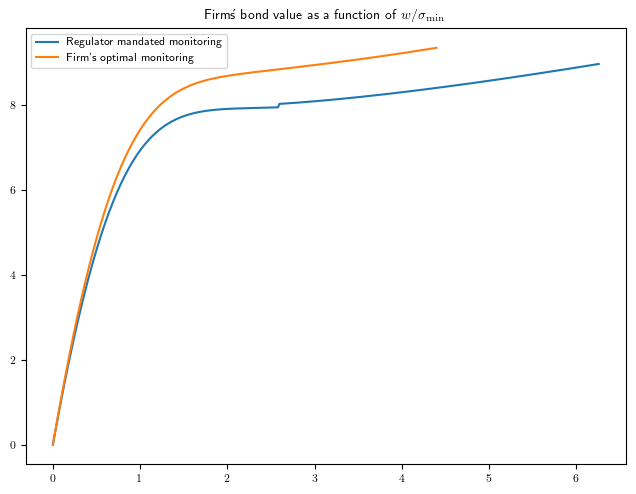

In [41]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
NS = SOL.x[:ind]/SOL.param[4][-1]
NS1 = SOL1.x[:ind1]/SOL1.param[4][-1]
B_NS = SOL.f[:ind]+SOL.x[:ind]/SOL.param[4][-1]-(1-SOL.param[3])*SOL.S + SOL.C
B1_NS = SOL1.f[:ind1]+SOL1.x[:ind1]/SOL1.param[4][-1]-(1-SOL1.param[3])*SOL1.S + SOL1.C
plt.plot(NS,B_NS,label='Regulator mandated monitoring')
plt.plot(NS1,B1_NS,label='Firm\'s optimal monitoring');
plt.legend();
plt.tight_layout();
plt.title(r'Firm\'s bond value as a function of $w/\sigma_{\min}$');
np.savetxt('mandatory_bond_vs_new_slack.dat', np.column_stack((NS,B_NS)), delimiter=',',header="M,mandate") 
np.savetxt('optimal_bond_vs_new_slack.dat', np.column_stack((NS1,B1_NS)), delimiter=',',header="M,optimal")